# Breast cancer prediction

## Problem Statement

Breast cancer is a type of cancer that develops in the cells of the breasts. It typically starts in the lining cells of the ducts or lobules of the glandular tissue in the breast. In the early stages, breast cancer growth is confined to the duct or lobule and generally causes no symptoms, and has minimal potential for spreading to other parts of the body.

Diagnosing breast cancer involves microscopic analysis of a sample or biopsy of the affected area of the breast. While most types of breast cancer are easy to diagnose through a biopsy, there are some types of breast cancer that require specialized lab exams

This  model is trained for dataset of breast tumor information, including features such as tumor size, shape, and texture. After training,  the performance of  model is evaluated and compared their accuracy in predicting malignant and benign tumors.

## Loading the Dataset

In [1]:
#displaying the content of file
N = 15
with open('C:/Users/lenovo/Documents/Practice/data01.csv', 'r') as f:
    dataset_content = f.readlines()

head_rows = dataset_content[:N]

for row in head_rows:
    columns = row.strip().split(',')
    print(columns)

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
['842302', '1', '17.99', '10.38', '122.8', '1001', '0.1184', '0.2776', '0.3001', '0.1471', '0.2419', '0.07871', '1.095', '0.9053', '8.589', '153.4', '0.006399', '0.04904', '0.05373', '0.01587', '0.03003', '0.006193', '25.38', '17.33', '184.6', '2019', '0.1622', '0.6656', '0.7119', '0.2654', '0.4601', '0.1189']
['842517', '1', '20.57', '17.77', '132.9', '1326', '0.08474', '0.07864', '0.0869', '0.07017', '0.1812', '0.05667', '0.5435'

In [2]:
#reading first five lines
with open('C:/Users/lenovo/Documents/Practice/data01.csv', 'r') as f:
    for i in range(5):
        line = f.readline()
        print(line)

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst

842302,1,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189

842517,1,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902

84300903,1,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.

## Pre-processing Steps

#### Checking the columns

In [3]:
with open('C:/Users/lenovo/Documents/Practice/data01.csv', 'r') as f:
    first_line = f.readline().strip()
    columns = first_line.split(',')
    print(columns)

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


#### Checking the lenght of columns

In [4]:
with open('C:/Users/lenovo/Documents/Practice/data01.csv', 'r') as file:
    length = []
    for line in file:
        values = line.split(',')
        length.append(len(values))
    print("Columns:", max(length))

Columns: 32


#### Checking missing values

In [5]:
#checking missing values

with open('C:/Users/lenovo/Documents/Practice/data01.csv', 'r') as file:
    row_count = 0 
    missing_values_count = 0
    
    for line in file:
        if row_count == 0:
            row_count += 1
            continue
        values = line.strip().split(',')
        
        for value in values:
            if value == '' or value == 'na': 
                missing_values_count += 1
        
        row_count += 1

print("Total missing values:", missing_values_count)

Total missing values: 10


In [6]:
with open('C:/Users/lenovo/Documents/Practice/data.csv', 'r') as file:
    row_count = 0

    values = []
    q1_values = []
    q3_values = []

    for line in file:
        if row_count == 0:
            row_count += 1
            continue
        row_values = line.strip().split(',')

        for value in row_values:
            values.append(float(value))
        row_count += 1

    sorted_values = sorted(values)

    n = len(sorted_values)
    q1_index = int(n / 4)
    q3_index = int(3 * n / 4)
    q1 = sorted_values[q1_index]
    q3 = sorted_values[q3_index]

    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outlier_count = 0
    for value in values:
        if value < lower_bound or value > upper_bound:
            outlier_count += 1
    print('Outlier count:', outlier_count)


Outlier count: 2997


#### Importing libraries

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
df = pd.read_csv("C:/Users/lenovo/Documents/Practice/data01.csv")

In [9]:
df.isnull().sum()

id                          0
diagnosis                   0
radius_mean                 0
texture_mean                0
perimeter_mean              0
area_mean                   0
smoothness_mean            10
compactness_mean            0
concavity_mean              0
concave points_mean         0
symmetry_mean               0
fractal_dimension_mean      0
radius_se                   0
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               0
compactness_se              0
concavity_se                0
concave points_se           0
symmetry_se                 0
fractal_dimension_se        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst             0
concave points_worst        0
symmetry_worst              0
fractal_dimension_worst     0
dtype: int64

<AxesSubplot:>

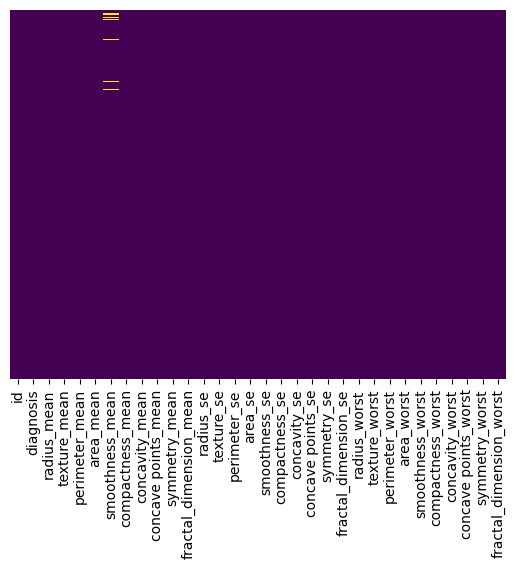

In [10]:
#create a simple heatmap to see for missing data!
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

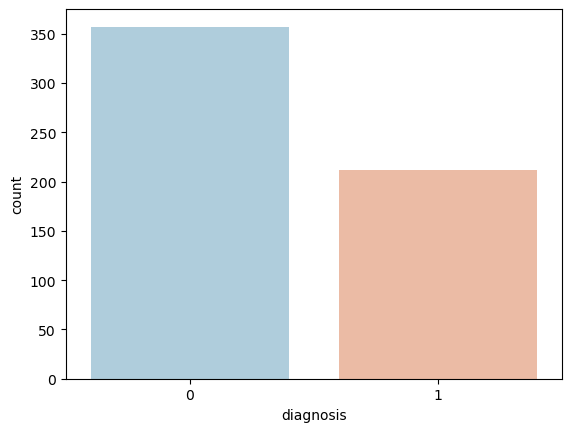

In [11]:
sns.countplot(x= 'diagnosis',data=df,palette='RdBu_r')

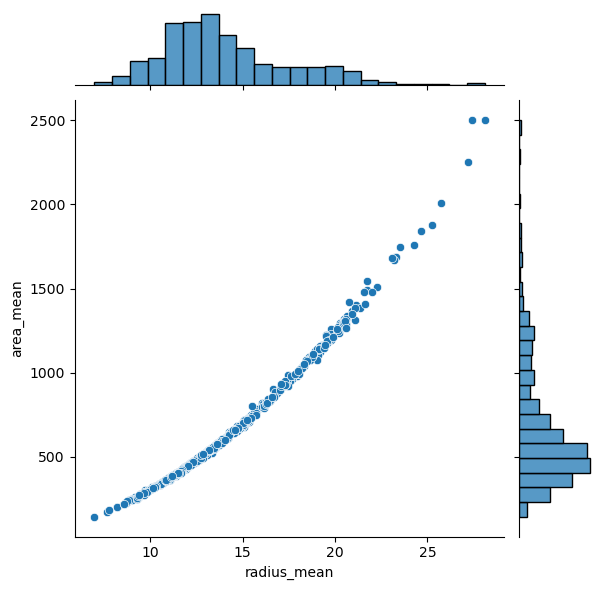

In [12]:
sns.jointplot(x = df['radius_mean'], y = df['area_mean'], kind = 'scatter')

In [13]:
df.dtypes

id                           int64
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

#### Checking the list of columns

In [14]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

#### Median imputation

In [15]:
#finding the mean of 'Age' column and filling the null values with median value obtain
df['smoothness_mean'].fillna(df['smoothness_mean'].median(),inplace=True)

<AxesSubplot:xlabel='smoothness_mean', ylabel='Count'>

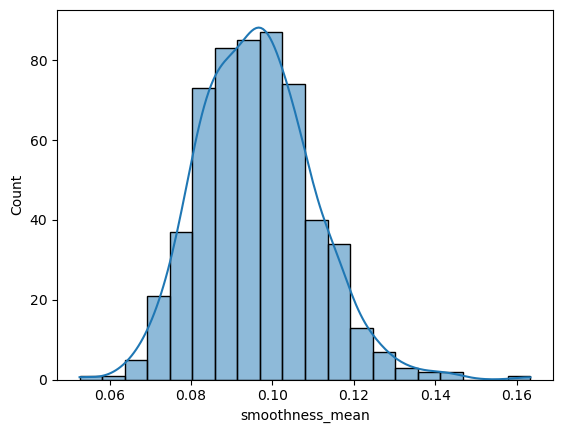

In [16]:
sns.histplot(data=df, x='smoothness_mean', bins=20, kde=True)

In [17]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Train- test split 

In [19]:
features = df.columns
nb_train = int(np.floor(0.7 * len(df)))
df = df.sample(frac=1, random_state=1)
X_train = df[features][:nb_train]
y_train = df['diagnosis'][:nb_train].values
X_test = df[features][nb_train:]
y_test = df['diagnosis'][nb_train:].values

## Model building

In [20]:
def entropy(p):
    if p == 0:
        return 0
    elif p == 1:
        return 0
    else:
        return - (p * np.log2(p) + (1 - p) * np.log2(1-p))

def information_gain(left_child, right_child):
    parent = left_child + right_child
    p_parent = parent.count(1) / len(parent) if len(parent) > 0 else 0
    p_left = left_child.count(1) / len(left_child) if len(left_child) > 0 else 0
    p_right = right_child.count(1) / len(right_child) if len(right_child) > 0 else 0
    IG_p = entropy(p_parent)
    IG_l = entropy(p_left)
    IG_r = entropy(p_right)
    return IG_p - len(left_child) / len(parent) * IG_l - len(right_child) / len(parent) * IG_r

In [21]:
def draw_bootstrap(X_train, y_train):
    bootstrap_indices = list(np.random.choice(range(len(X_train)), len(X_train), replace = True))
    oob_indices = [i for i in range(len(X_train)) if i not in bootstrap_indices]
    X_bootstrap = X_train.iloc[bootstrap_indices].values
    y_bootstrap = y_train[bootstrap_indices]
    X_oob = X_train.iloc[oob_indices].values
    y_oob = y_train[oob_indices]
    return X_bootstrap, y_bootstrap, X_oob, y_oob

def oob_score(tree, X_test, y_test):
    mis_label = 0
    for i in range(len(X_test)):
        pred = predict_tree(tree, X_test[i])
        if pred != y_test[i]:
            mis_label += 1
    return mis_label / len(X_test)

In [22]:
def find_split_point(X_bootstrap, y_bootstrap, max_features):
    feature_ls = list()
    num_features = len(X_bootstrap[0])

    while len(feature_ls) <= max_features:
        feature_idx = random.sample(range(num_features), 1)
        if feature_idx not in feature_ls:
            feature_ls.extend(feature_idx)

    best_info_gain = -999
    node = None
    for feature_idx in feature_ls:
        for split_point in X_bootstrap[:,feature_idx]:
            left_child = {'X_bootstrap': [], 'y_bootstrap': []}
            right_child = {'X_bootstrap': [], 'y_bootstrap': []}

            # split children for continuous variables
            if type(split_point) in [int, float]:
                for i, value in enumerate(X_bootstrap[:,feature_idx]):
                    if value <= split_point:
                        left_child['X_bootstrap'].append(X_bootstrap[i])
                        left_child['y_bootstrap'].append(y_bootstrap[i])
                    else:
                        right_child['X_bootstrap'].append(X_bootstrap[i])
                        right_child['y_bootstrap'].append(y_bootstrap[i])
            # split children for categoric variables
            else:
                for i, value in enumerate(X_bootstrap[:,feature_idx]):
                    if value == split_point:
                        left_child['X_bootstrap'].append(X_bootstrap[i])
                        left_child['y_bootstrap'].append(y_bootstrap[i])
                    else:
                        right_child['X_bootstrap'].append(X_bootstrap[i])
                        right_child['y_bootstrap'].append(y_bootstrap[i])

            split_info_gain = information_gain(left_child['y_bootstrap'], right_child['y_bootstrap'])
            if split_info_gain > best_info_gain:
                best_info_gain = split_info_gain
                left_child['X_bootstrap'] = np.array(left_child['X_bootstrap'])
                right_child['X_bootstrap'] = np.array(right_child['X_bootstrap'])
                node = {'information_gain': split_info_gain,
                        'left_child': left_child,
                        'right_child': right_child,
                        'split_point': split_point,
                        'feature_idx': feature_idx}


    return node


In [23]:
def terminal_node(node):
    y_bootstrap = node['y_bootstrap']
    pred = max(y_bootstrap, key = y_bootstrap.count)
    return pred


def split_node(node, max_features, min_samples_split, max_depth, depth):
    left_child = node['left_child']
    right_child = node['right_child']

    del(node['left_child'])
    del(node['right_child'])

    if len(left_child['y_bootstrap']) == 0 or len(right_child['y_bootstrap']) == 0:
        empty_child = {'y_bootstrap': left_child['y_bootstrap'] + right_child['y_bootstrap']}
        node['left_split'] = terminal_node(empty_child)
        node['right_split'] = terminal_node(empty_child)
        return

    if depth >= max_depth:
        node['left_split'] = terminal_node(left_child)
        node['right_split'] = terminal_node(right_child)
        return node

    if len(left_child['X_bootstrap']) <= min_samples_split:
        node['left_split'] = node['right_split'] = terminal_node(left_child)
    else:
        node['left_split'] = find_split_point(left_child['X_bootstrap'], left_child['y_bootstrap'], max_features)
        split_node(node['left_split'], max_depth, min_samples_split, max_depth, depth + 1)
    if len(right_child['X_bootstrap']) <= min_samples_split:
        node['right_split'] = node['left_split'] = terminal_node(right_child)
    else:
        node['right_split'] = find_split_point(right_child['X_bootstrap'], right_child['y_bootstrap'], max_features)
        split_node(node['right_split'], max_features, min_samples_split, max_depth, depth + 1)

In [24]:
def build_tree(X_bootstrap, y_bootstrap, max_depth, min_samples_split, max_features):
    root_node = find_split_point(X_bootstrap, y_bootstrap, max_features)
    split_node(root_node, max_features, min_samples_split, max_depth, 1)
    return root_node

def random_forest(X_train, y_train, n_estimators, max_features, max_depth, min_samples_split):
    tree_ls = list()
    oob_ls = list()
    for i in range(n_estimators):
        X_bootstrap, y_bootstrap, X_oob, y_oob = draw_bootstrap(X_train, y_train)
        tree = build_tree(X_bootstrap, y_bootstrap, max_features, max_depth, min_samples_split)
        tree_ls.append(tree)
        oob_error = oob_score(tree, X_oob, y_oob)
        oob_ls.append(oob_error)
    print("OOB estimate: {:.2f}".format(np.mean(oob_ls)))
    return tree_ls

In [25]:
def predict_tree(tree, X_test):
    feature_idx = tree['feature_idx']

    if X_test[feature_idx] <= tree['split_point']:
        if type(tree['left_split']) == dict:
            return predict_tree(tree['left_split'], X_test)
        else:
            value = tree['left_split']
            return value
    else:
        if type(tree['right_split']) == dict:
            return predict_tree(tree['right_split'], X_test)
        else:
            return tree['right_split']

In [26]:
def predict_rf(tree_ls, X_test):
    pred_ls = list()
    for i in range(len(X_test)):
        ensemble_preds = [predict_tree(tree, X_test.values[i]) for tree in tree_ls]
        final_pred = max(ensemble_preds, key = ensemble_preds.count)
        pred_ls.append(final_pred)
    return np.array(pred_ls)

###### The random module is imported, which is used to generate random numbers.

###### The hyperparameters of the random forest model are set as follows:

n_estimators: The number of decision trees in the forest, which is set to 50 in this case.

max_features: The maximum number of features each tree is allowed to use when making a split. Here, it is set to 3, which means that each tree can randomly select up to 3 features at each split.

max_depth: The maximum depth of each decision tree. This is set to 4, which means that each tree can have at most 4 levels of splits.

min_samples_split: The minimum number of samples required to make a split at a node. Here, it is set to 2, which means that a split will be made only if there are at least 2 samples at a node.

Finally, the random_forest() function is called with X_train and y_train as input, along with the hyperparameters defined above. This function is expected to return a trained random forest model. 

In [32]:
import random

n_estimators = 50
max_features = 3
max_depth = 4
min_samples_split = 2

model = random_forest(X_train, y_train, n_estimators=50, max_features=3, max_depth=4, min_samples_split=2)


OOB estimate: 0.64


###### The Out-of-Bag (OOB) estimate is a statistical method used in the context of decision trees and random forests.The OOB estimate is a way to estimate the performance of the random forest using only the samples that were not used to train a particular tree.

In [33]:
preds = predict_rf(model, X_test)
acc = sum(preds == y_test) / len(y_test)
print("Testing accuracy: {}".format(np.round(acc,3)))

Testing accuracy: 0.386
